<a href="https://colab.research.google.com/github/eugenie-kim012/Daily-Log/blob/main/20th_May_2025_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자연어 처리 기초

CountVectorizer

각 문장에서 단어 출현 횟수를 카운팅하는 방법 (BOW, Bag Of Word)
TfidfVectorizer

다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법
TF-IDF(Term Frequency - Inverse Document Frequency)
형태소 분석기

konlpy: 한국어 처리를 위한 형태소 분석기
형태소: 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위

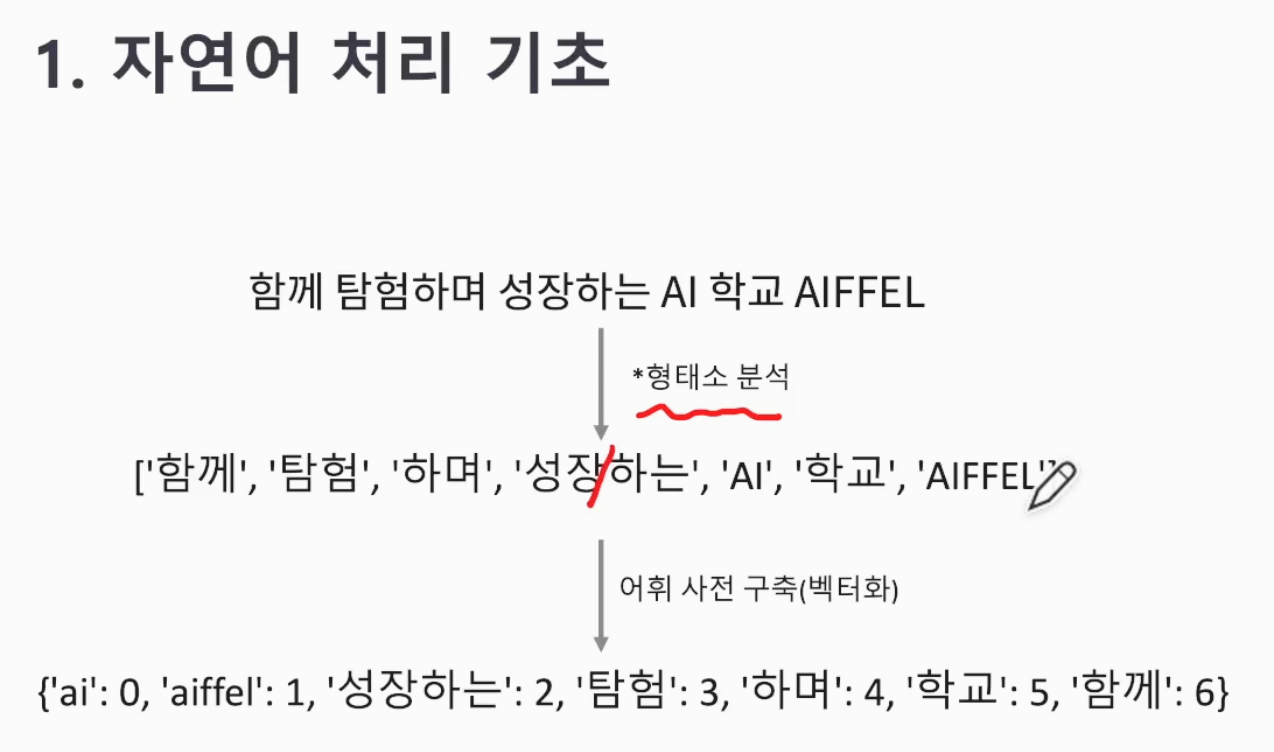

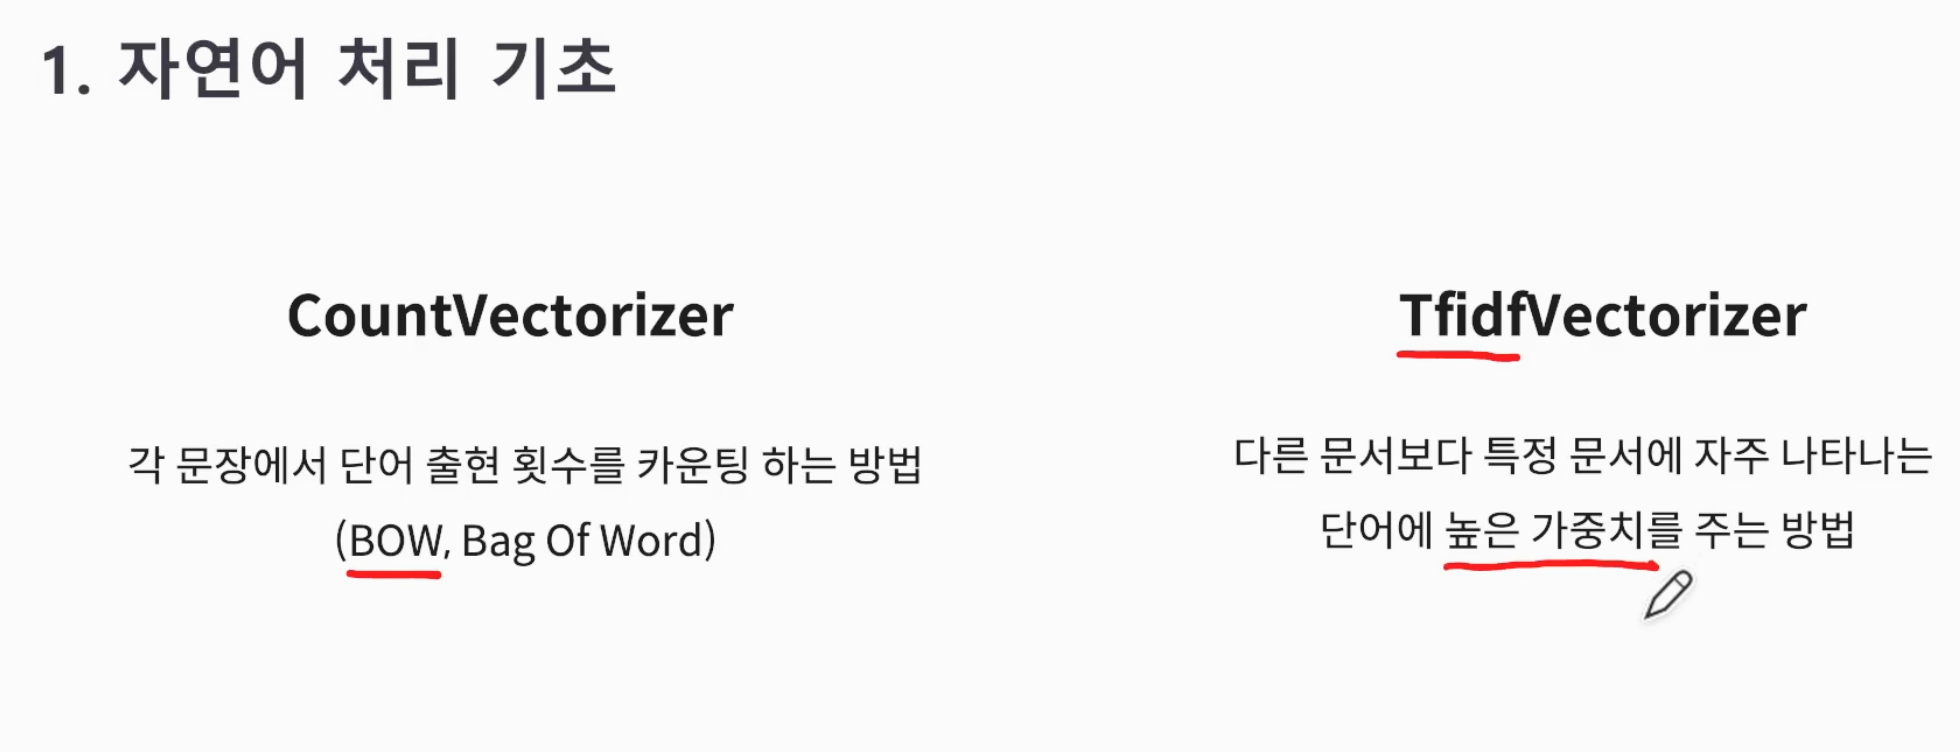

# 자연어 처리 기초

## 형태소 분석기

In [6]:
# 판다스 라이브러리 불러오기
import pandas as pd

In [7]:
# konlpy 설치 [LMS 에는 이미 설치가 되어 있습니다.]
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 35.3 MB/s eta 0:00:00


In [8]:
# 라이브러리 불러오기 (okt)
import konlpy
from konlpy.tag import Okt #분석기의 활용
tokenizer = Okt()

In [9]:
# 토큰화 (형태소 단위)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text) #문서를 형태소 단위로 토큰화 - 코드 쓰면 저절로 분석해줌

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [10]:
# 토큰화 (명사만 추출) - 조금 다른 tokeniser 방법
tokenizer.nouns(text)

['탐험', '학교']

In [11]:
# 토큰화 (품사 태깅) - 이후 어휘 사전에 기반하여 각 형태소에 숫자를 매기는 것
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

# 1. CountVectorizer
[리마인드] 각 문장에서 단어 출현 횟수를 카운팅하는 방법 (BOW, Bag Of Word)

In [12]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [13]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(text)

In [14]:
# 데이터 학습
vect.fit(words)

CountVectorizer()

In [15]:
# 학습된 어휘
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [16]:
# 단어 사전 #언더바까지 작성하여야 함
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [17]:
# 단어 사전 크기 (문장이 하나밖에 없으니까)
len(vect.vocabulary_)

7

In [18]:
# 인코딩
df_t = vect.transform(words)

In [19]:
# 인코딩된 데이터 Matrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [20]:
# 어휘와 피처 - 데이터 프레임으로 바꾸는 격
import pandas as pd
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [21]:
# test
test = "AI 공부하며 함께 성장해요!"

In [22]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [23]:
#
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [24]:
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


2. TfidfVectorizer
[리마인드] 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법

In [25]:
 #tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# tf-idf
vect = TfidfVectorizer() #변수에서 선언하기
words = tokenizer.morphs(text) #단어를 형태소 분석하기
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [27]:
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

# 감성 분석

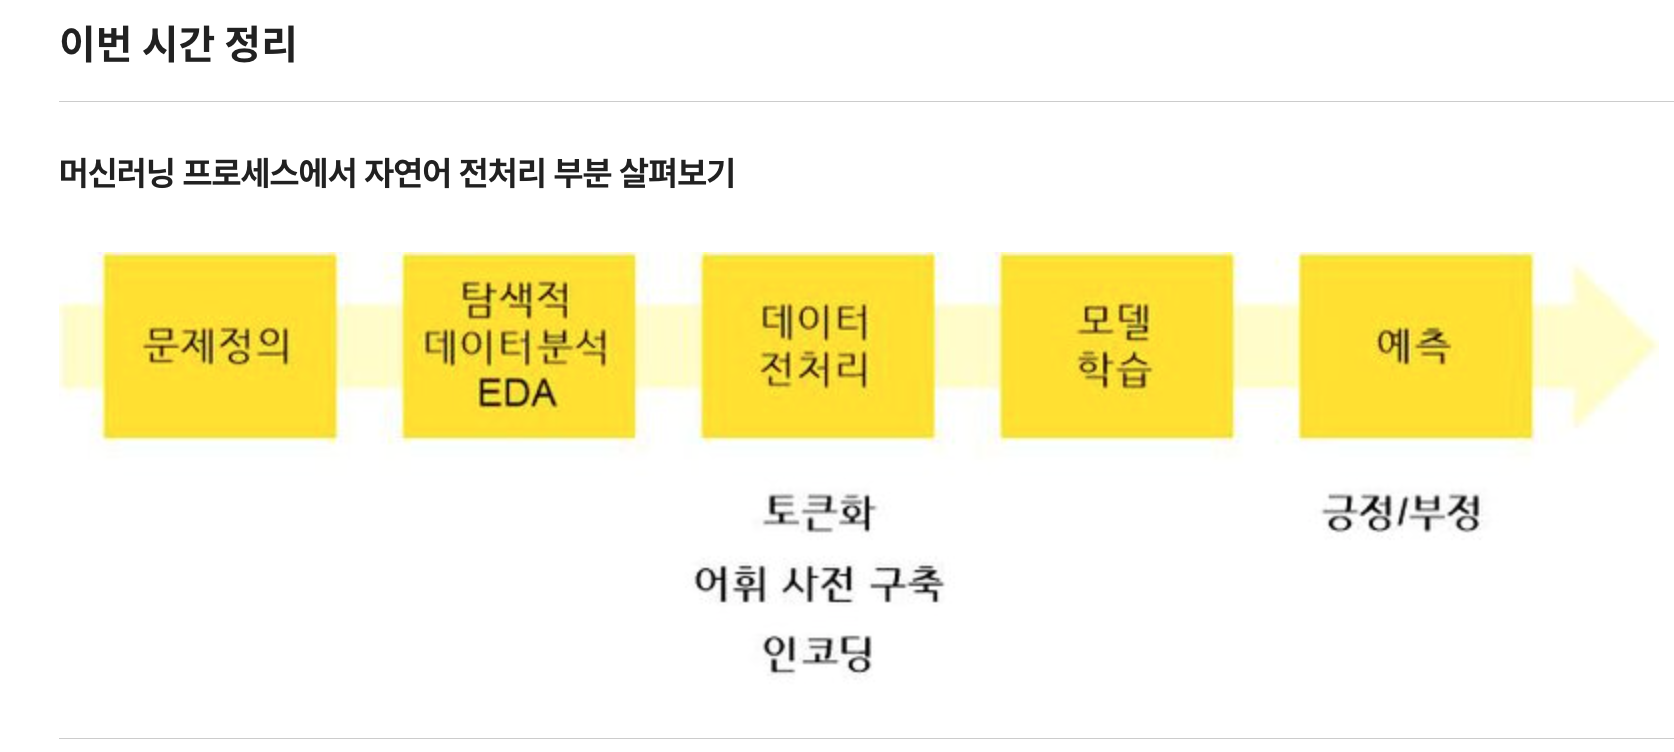

In [28]:
# 라이브러리 불러오기
import pandas as pd

In [29]:
# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

In [30]:
# 데이터 샘플
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [31]:
# 데이터 크기
df.shape

(150000, 3)

In [32]:
# 타겟 확인 - 타갯 비율이 비슷, 머신 러닝 시 성능이 좋게 나옴
df['label'].value_counts()

,count
label,
0,75173
1,74827


In [33]:
# 결측치
df.isnull().sum()

,0
id,0
document,5
label,0


In [34]:
# 결측치 삭제
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [35]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len) #뒤에 문장의 길이를 나타내는 len붙음
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

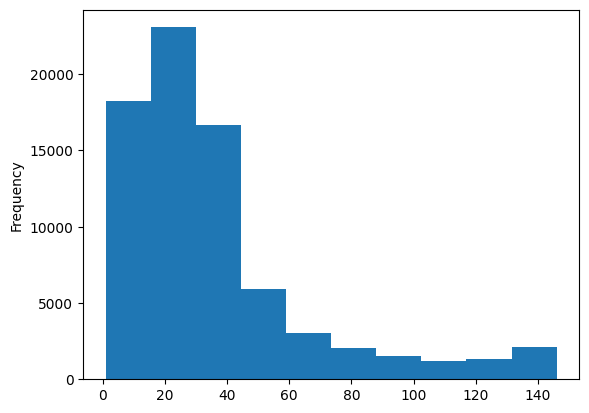

In [36]:
# len 시각화 (label == 0)
import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist')

<Axes: ylabel='Frequency'>

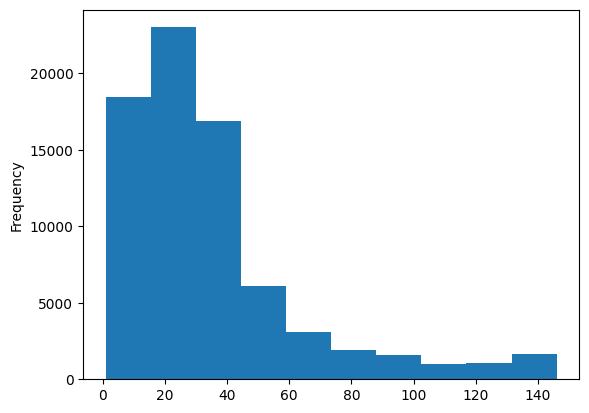

In [37]:
# len 시각화 (label == 1)
df[df.label==1]['len'].plot(kind='hist')

In [38]:
# 데이터 샘플링
df = df[:1000]

In [39]:
# 토큰화
vect = CountVectorizer(tokenizer=tokenizer.morphs) #tokenise된 것을 바탕으로 인코딩을 완료하기
vectors = vect.fit_transform(df['document'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


3. 머신러닝 > 교차검증
[리마인드] 교차검증이란?

일반적으로 모델을 학습시킬 때 데이터를 train set과 test set으로 나누어 train set을 가지고 학습을 수행합니다.
교차검증이란 여기서 train set을 다시 train set과 validation set으로 나누어 학습 중 검증과 수정을 수행하는 것을 의미합니다.
[리마인드] F1 이란?

분류 모델의 평가 지표 중 하나로, 정밀도(precision)와 재현율(recall)의 조화평균을 나타냅니다.
<참고> 5. 지도학습(분류) 노드의 5-5. 교차검증, 5-6. 평가(분류) 스텝에서 복습하실 수 있습니다.

In [40]:
# 머신러닝
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

np.float64(0.6634352457852256)

# 자연어 전처리

자연어 전처리
자연어 전처리 기법은 매우 다양하지만 이번 시간에는 한글을 다룰 때 꼭 알아야할 5가지에 대해 설명해 드리겠습니다.

이번 시간 정리
어휘 사전 구축
00% 이상 나타나는 단어 무시
최소 N개의 문장에만 나타나는 단어만 유지
불용어(stopword)
큰 의미가 없는 단어
예) 을, 는, 이, 가, 여기, 저기
띄어쓰기
반복되는 글자 정리
맞춤법 검사

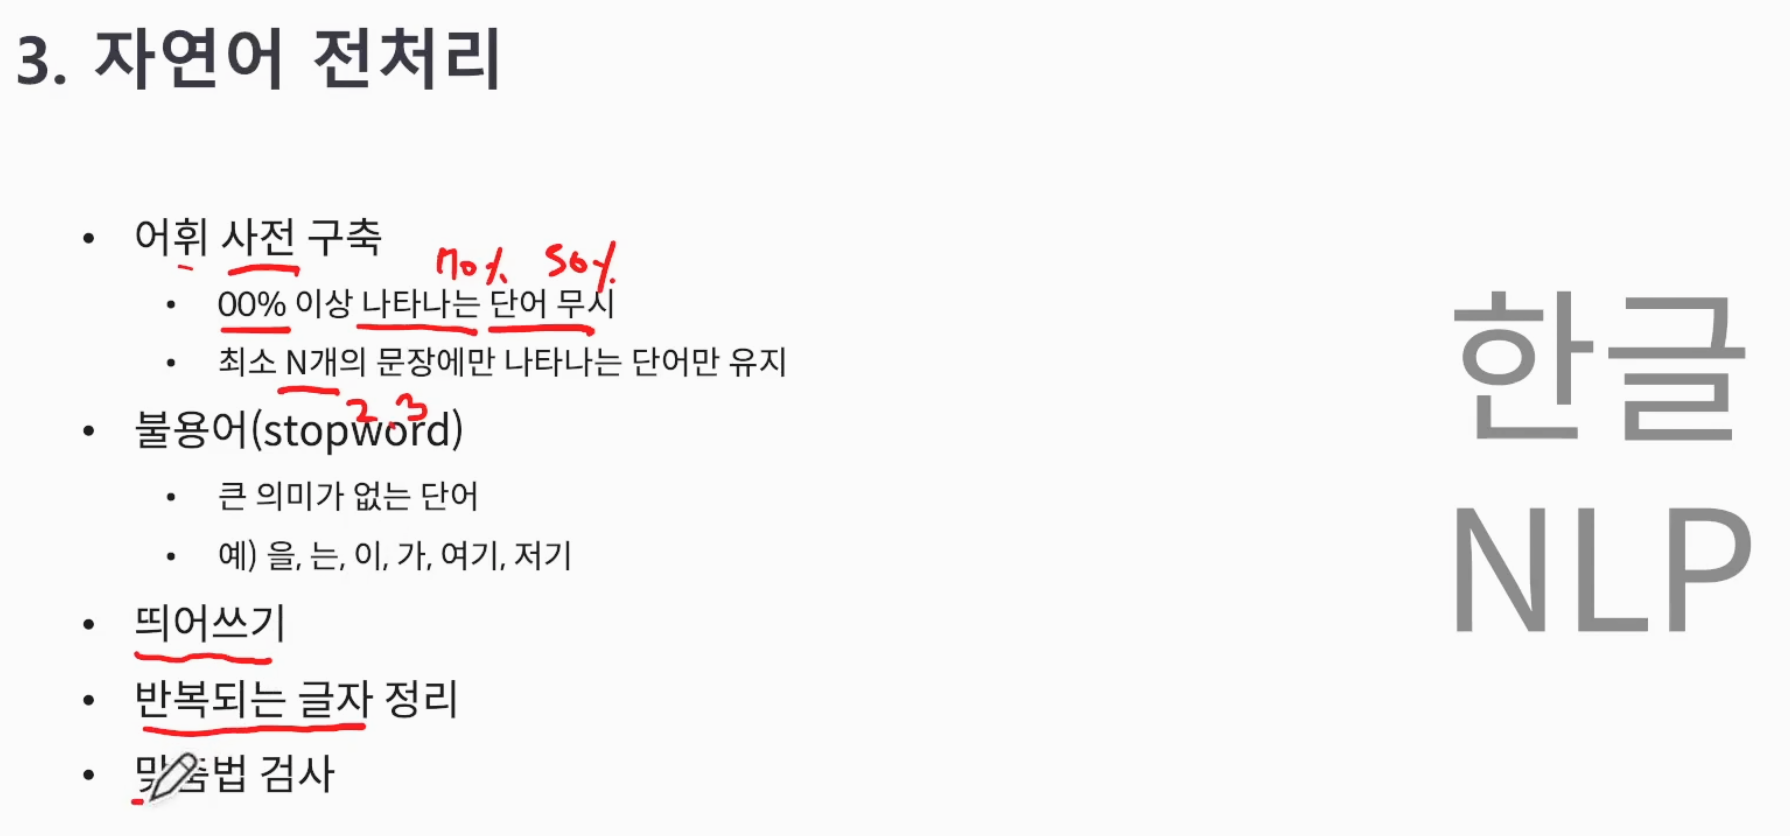

# 어휘 사전 구축

1. 어휘 사전 구축


In [41]:
# 토큰화(max_df) N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


np.float64(0.694)

In [42]:
# 토큰화(max_df) N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df=10)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


np.float64(0.643)

In [43]:
# 토큰화(min_df) N개 보다 작은 단어 수 무시 #성능이 조금 올라감
vect = CountVectorizer(tokenizer=tokenizer.morphs, min_df=2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


np.float64(0.689)

2. 불용어

In [45]:
#Stop words
text="함께 탐험하며 성장하는 AI 학교 AIFFEL"
stop_words = ['하며', 'ai']
vect = CountVectorizer(stop_words=stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

3. 띄어쓰기
더 자세히: https://github.com/haven-jeon/PyKoSpacing

In [46]:
# Spacing 설치
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-fiu9x1m7
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-fiu9x1m7
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889cbd10b006d2f4aba118f0cd5b677e2979
  Preparing metadata (setup.py) ... done
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2286920 sha256=f084add4060bbebfa5fc8265da5490369be7ca2929c2f5287e21bc50c43eb39d
  Stored in directory: /tmp/pip-ephem-wheel-cache-vicgd033/wheels/1f/3f/64/6d5b2c9ba9cd5aa624676868e8ae8ec684672ce1bcbe20add8
Successfully built pykospacing


In [48]:
#  띄어쓰기 - 한글 맞춤법 그런 경우 많아
from pykospacing import Spacing
spacing = Spacing()

text = "함께탐험하며성장하는AI학교AIFFEL"
spacing_test = spacing(text)
print(text)
print(spacing_test)

함께탐험하며성장하는AI학교AIFFEL
함께 탐험하며 성장하는 AI 학교 AIFFEL


4. 반복되는 글자 정리
더 자세히: https://github.com/lovit/soynlp

In [49]:
# soynlp 설치
!pip install soynlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 6.9 MB/s eta 0:00:00


In [50]:
# 댓글 데이터에 등장하는 반복되는 이모티콘의 정리
from soynlp.normalizer import *

emoticon_normalize('하하하하ㅋㅋㅋㅋㅋㅠㅠㅠㅠㅠㅠ', num_repeats=3)

'하하하ㅋㅋㅋㅠㅠㅠ'

5. 맞춤법 검사기
더 자세히: https://github.com/ssut/py-hanspell
갑작스러운 정책 변경으로 hanspell 사용이 불가능한 상황입니다. 이슈가 해결되는 대로 업데이트하겠습니다.

In [57]:
# py-hanspell 설치
pip install py-hanspell


SyntaxError: invalid syntax (<ipython-input-57-bfa127693592>, line 2)

In [53]:
# 맞춤법 검사
from hanspell import spell_checker
text = '알파고 이전, 2015년부터 만들 어진 최초의AI 커뮤니티 모두의연구소.학연, 지연, 모두연이라는 말이나올만큼 AI의 보금자리로서 중요한 역할을 하고있는 모두의연구소에서 만들었습니다. AI기술을 커뮤니티로 배우는 유일 한 기관 아이펠과 함께 밝은 미래를 만들어보세요.'


In [55]:
spell_checker.check(text)


KeyError: 'result'

In [56]:
result = spell_checker.check(text)
result.as_dict()

KeyError: 'result'

In [2]:
# 수정된 문장
result.checked

NameError: name 'result' is not defined